In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
%matplotlib inline
import os


# Reading csv

In [2]:
#reading the file 
# Provide the correct file path for your CSV file
file_path = r"C:\Users\jonat\OneDrive\Jupyter notebook\UA library\Health insurance by age range and disability - Sheet1.csv"

# Read the CSV file
file1 = pd.read_csv(file_path)
file1.head()

,Label (Grouping),Total:,Under 19 years:,With a disability:,With health insurance coverage:,With private health insurance coverage,With public health coverage,No health insurance coverage,No disability:,With health insurance coverage:.1,...,With a disability:.2,With health insurance coverage:.4,With private health insurance coverage.4,With public health coverage.4,No health insurance coverage.4,No disability:.2,With health insurance coverage:.5,With private health insurance coverage.5,With public health coverage.5,No health insurance coverage.5
0,Alabama!!Estimate,"4,988,625","1,182,663","64,846","63,382","27,185","40,777","1,464","1,117,817","1,082,053",...,"341,742","341,036","184,936","336,644",706,"548,156","545,335","332,367","527,907","2,821"
1,Alaska!!Estimate,"701,511","183,084","8,092","7,685","4,502","4,373",407,"174,992","160,008",...,"33,928","33,722","18,853","33,218",206,"66,057","64,883","44,794","60,813","1,174"
2,Arizona!!Estimate,"7,251,924","1,683,061","86,850","81,295","42,474","48,893","5,555","1,596,211","1,460,012",...,"434,713","431,582","215,359","425,340","3,131","927,485","918,455","481,293","880,678","9,030"
3,Arkansas!!Estimate,"2,991,199","739,713","49,246","46,904","16,358","35,693","2,342","690,467","648,975",...,"209,557","209,133","103,125","207,617",424,"313,575","311,578","175,266","302,398","1,997"
4,California!!Estimate,"38,548,670","9,016,549","373,663","363,444","175,389","226,480","10,219","8,642,886","8,365,704",...,"2,024,775","2,005,543","856,988","1,961,760","19,232","4,030,046","3,981,504","2,035,778","3,724,912","48,542"


In [3]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 35 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Label (Grouping)                                          52 non-null     object
 1   Total:                                                    52 non-null     object
 2       Under 19 years:                                       52 non-null     object
 3           With a disability:                                52 non-null     object
 4               With health insurance coverage:               52 non-null     object
 5                   With private health insurance coverage    52 non-null     object
 6                   With public health coverage               52 non-null     object
 7               No health insurance coverage                  52 non-null     object
 8           No disability:          

In [4]:
file1.describe()

,Label (Grouping),Total:,Under 19 years:,With a disability:,With health insurance coverage:,With private health insurance coverage,With public health coverage,No health insurance coverage,No disability:,With health insurance coverage:.1,...,With a disability:.2,With health insurance coverage:.4,With private health insurance coverage.4,With public health coverage.4,No health insurance coverage.4,No disability:.2,With health insurance coverage:.5,With private health insurance coverage.5,With public health coverage.5,No health insurance coverage.5
count,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
unique,52,52,52,52,52,52,52,51,52,52,...,52,52,52,52,52,52,52,52,52,52
top,Alabama!!Estimate,"4,988,625","1,182,663","64,846","63,382","27,185","40,777","1,584","1,117,817","1,082,053",...,"341,742","341,036","184,936","336,644",706,"548,156","545,335","332,367","527,907","2,821"
freq,1,1,1,1,1,1,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1


# Deleting "!!Estimate" 

In [5]:
# Replace the substring "!!Estimate" with an empty string in all column names.
file1.columns = file1.columns.str.replace("!!Estimate", "")

# Remove the "!!Estimate" substring from the "Label (Grouping)" column
file1["Label (Grouping)"] = file1["Label (Grouping)"].str.replace("!!Estimate", "")

# Print the modified DataFrame
file1.head()


,Label (Grouping),Total:,Under 19 years:,With a disability:,With health insurance coverage:,With private health insurance coverage,With public health coverage,No health insurance coverage,No disability:,With health insurance coverage:.1,...,With a disability:.2,With health insurance coverage:.4,With private health insurance coverage.4,With public health coverage.4,No health insurance coverage.4,No disability:.2,With health insurance coverage:.5,With private health insurance coverage.5,With public health coverage.5,No health insurance coverage.5
0,Alabama,"4,988,625","1,182,663","64,846","63,382","27,185","40,777","1,464","1,117,817","1,082,053",...,"341,742","341,036","184,936","336,644",706,"548,156","545,335","332,367","527,907","2,821"
1,Alaska,"701,511","183,084","8,092","7,685","4,502","4,373",407,"174,992","160,008",...,"33,928","33,722","18,853","33,218",206,"66,057","64,883","44,794","60,813","1,174"
2,Arizona,"7,251,924","1,683,061","86,850","81,295","42,474","48,893","5,555","1,596,211","1,460,012",...,"434,713","431,582","215,359","425,340","3,131","927,485","918,455","481,293","880,678","9,030"
3,Arkansas,"2,991,199","739,713","49,246","46,904","16,358","35,693","2,342","690,467","648,975",...,"209,557","209,133","103,125","207,617",424,"313,575","311,578","175,266","302,398","1,997"
4,California,"38,548,670","9,016,549","373,663","363,444","175,389","226,480","10,219","8,642,886","8,365,704",...,"2,024,775","2,005,543","856,988","1,961,760","19,232","4,030,046","3,981,504","2,035,778","3,724,912","48,542"


In [6]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 35 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Label (Grouping)                                          52 non-null     object
 1   Total:                                                    52 non-null     object
 2       Under 19 years:                                       52 non-null     object
 3           With a disability:                                52 non-null     object
 4               With health insurance coverage:               52 non-null     object
 5                   With private health insurance coverage    52 non-null     object
 6                   With public health coverage               52 non-null     object
 7               No health insurance coverage                  52 non-null     object
 8           No disability:          

In [7]:
# Remove additional spacing from column names
file1.columns = file1.columns.str.strip()

# Print the modified DataFrame
print(file1.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Label (Grouping)                          52 non-null     object
 1   Total:                                    52 non-null     object
 2   Under 19 years:                           52 non-null     object
 3   With a disability:                        52 non-null     object
 4   With health insurance coverage:           52 non-null     object
 5   With private health insurance coverage    52 non-null     object
 6   With public health coverage               52 non-null     object
 7   No health insurance coverage              52 non-null     object
 8   No disability:                            52 non-null     object
 9   With health insurance coverage:.1         52 non-null     object
 10  With private health insurance coverage.1  52 non-nul

# Convert datatype

In [8]:

columns_to_convert = file1.columns[1:]  # Exclude the first column

# Remove commas and convert selected columns to float
file1[columns_to_convert] = file1[columns_to_convert].replace({',': ''}, regex=True).astype(float)


In [9]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Label (Grouping)                          52 non-null     object 
 1   Total:                                    52 non-null     float64
 2   Under 19 years:                           52 non-null     float64
 3   With a disability:                        52 non-null     float64
 4   With health insurance coverage:           52 non-null     float64
 5   With private health insurance coverage    52 non-null     float64
 6   With public health coverage               52 non-null     float64
 7   No health insurance coverage              52 non-null     float64
 8   No disability:                            52 non-null     float64
 9   With health insurance coverage:.1         52 non-null     float64
 10  With private health insurance coverage.1

In [10]:
file1

,Label (Grouping),Total:,Under 19 years:,With a disability:,With health insurance coverage:,With private health insurance coverage,With public health coverage,No health insurance coverage,No disability:,With health insurance coverage:.1,...,With a disability:.2,With health insurance coverage:.4,With private health insurance coverage.4,With public health coverage.4,No health insurance coverage.4,No disability:.2,With health insurance coverage:.5,With private health insurance coverage.5,With public health coverage.5,No health insurance coverage.5
0,Alabama,4988625.0,1182663.0,64846.0,63382.0,27185.0,40777.0,1464.0,1117817.0,1082053.0,...,341742.0,341036.0,184936.0,336644.0,706.0,548156.0,545335.0,332367.0,527907.0,2821.0
1,Alaska,701511.0,183084.0,8092.0,7685.0,4502.0,4373.0,407.0,174992.0,160008.0,...,33928.0,33722.0,18853.0,33218.0,206.0,66057.0,64883.0,44794.0,60813.0,1174.0
2,Arizona,7251924.0,1683061.0,86850.0,81295.0,42474.0,48893.0,5555.0,1596211.0,1460012.0,...,434713.0,431582.0,215359.0,425340.0,3131.0,927485.0,918455.0,481293.0,880678.0,9030.0
3,Arkansas,2991199.0,739713.0,49246.0,46904.0,16358.0,35693.0,2342.0,690467.0,648975.0,...,209557.0,209133.0,103125.0,207617.0,424.0,313575.0,311578.0,175266.0,302398.0,1997.0
4,California,38548670.0,9016549.0,373663.0,363444.0,175389.0,226480.0,10219.0,8642886.0,8365704.0,...,2024775.0,2005543.0,856988.0,1961760.0,19232.0,4030046.0,3981504.0,2035778.0,3724912.0,48542.0
5,Colorado,5742363.0,1285242.0,54111.0,51536.0,25257.0,30403.0,2575.0,1231131.0,1171522.0,...,262539.0,260311.0,133192.0,255332.0,2228.0,634029.0,629957.0,340351.0,593654.0,4072.0
6,Connecticut,3582236.0,780597.0,41901.0,41096.0,17121.0,27064.0,805.0,738696.0,714889.0,...,191793.0,190314.0,92673.0,186381.0,1479.0,453077.0,449273.0,248766.0,419789.0,3804.0
7,Delaware,1005551.0,222571.0,10459.0,10310.0,5403.0,6287.0,149.0,212112.0,204773.0,...,63051.0,62718.0,41957.0,62230.0,333.0,145279.0,144088.0,97787.0,139057.0,1191.0
8,District of Columbia,661425.0,134213.0,5795.0,5795.0,1995.0,4258.0,0.0,128418.0,126544.0,...,26898.0,26812.0,14727.0,25377.0,86.0,58401.0,57911.0,37289.0,52425.0,490.0
9,Florida,21904247.0,4540824.0,227933.0,216137.0,102480.0,128473.0,11796.0,4312891.0,3988271.0,...,1472802.0,1460009.0,666162.0,1435858.0,12793.0,3218230.0,3178816.0,1553251.0,3035552.0,39414.0


# Groupby

In [11]:
label= file1.groupby("Label (Grouping)")
type(label)

pandas.core.groupby.generic.DataFrameGroupBy

In [12]:
type(file1)

pandas.core.frame.DataFrame

# Extract from DataFrameGroupBy

In [13]:
AZ_CA_NM_label = pd.concat([label.get_group("Arizona"), label.get_group("California"), label.get_group("New Mexico")])
AZ_CA_NM_label

,Label (Grouping),Total:,Under 19 years:,With a disability:,With health insurance coverage:,With private health insurance coverage,With public health coverage,No health insurance coverage,No disability:,With health insurance coverage:.1,...,With a disability:.2,With health insurance coverage:.4,With private health insurance coverage.4,With public health coverage.4,No health insurance coverage.4,No disability:.2,With health insurance coverage:.5,With private health insurance coverage.5,With public health coverage.5,No health insurance coverage.5
2,Arizona,7251924.0,1683061.0,86850.0,81295.0,42474.0,48893.0,5555.0,1596211.0,1460012.0,...,434713.0,431582.0,215359.0,425340.0,3131.0,927485.0,918455.0,481293.0,880678.0,9030.0
4,California,38548670.0,9016549.0,373663.0,363444.0,175389.0,226480.0,10219.0,8642886.0,8365704.0,...,2024775.0,2005543.0,856988.0,1961760.0,19232.0,4030046.0,3981504.0,2035778.0,3724912.0,48542.0
31,New Mexico,2074351.0,483198.0,28452.0,28386.0,8770.0,21529.0,66.0,454746.0,436406.0,...,153954.0,153024.0,71231.0,151284.0,930.0,246168.0,243552.0,129609.0,235792.0,2616.0


In [14]:
type(AZ_CA_NM_label)

pandas.core.frame.DataFrame

# Extract columns from DataFrame 

In [15]:
AZ_CA_NM_disability = AZ_CA_NM_label.loc[:, ['Label (Grouping)', 'Total:', 'Under 19 years:', 'With a disability:'
                                             ,'19 to 64 years:', 'With a disability:.1','65 years and over:'
                                             , 'With a disability:.2']]
AZ_CA_NM_disability

,Label (Grouping),Total:,Under 19 years:,With a disability:,19 to 64 years:,With a disability:.1,65 years and over:,With a disability:.2
2,Arizona,7251924.0,1683061.0,86850.0,4206665.0,463351.0,1362198.0,434713.0
4,California,38548670.0,9016549.0,373663.0,23477300.0,2128786.0,6054821.0,2024775.0
31,New Mexico,2074351.0,483198.0,28452.0,1191031.0,173234.0,400122.0,153954.0


In [16]:
# Calculate the percentage of people with a disability in each age group
AZ_CA_NM_disability['Percentage Disability Under 19'] = (AZ_CA_NM_disability['With a disability:'] 
                                                      / AZ_CA_NM_disability['Under 19 years:']) * 100

AZ_CA_NM_disability['Percentage Disability 19 to 64'] = (AZ_CA_NM_disability['With a disability:.1'] 
                                                      / AZ_CA_NM_disability['19 to 64 years:']) * 100

AZ_CA_NM_disability['Percentage Disability 65 and over'] = (AZ_CA_NM_disability['With a disability:.2']
                                                         / AZ_CA_NM_disability['65 years and over:']) * 100

AZ_CA_NM_disability

,Label (Grouping),Total:,Under 19 years:,With a disability:,19 to 64 years:,With a disability:.1,65 years and over:,With a disability:.2,Percentage Disability Under 19,Percentage Disability 19 to 64,Percentage Disability 65 and over
2,Arizona,7251924.0,1683061.0,86850.0,4206665.0,463351.0,1362198.0,434713.0,5.160241,11.014687,31.912615
4,California,38548670.0,9016549.0,373663.0,23477300.0,2128786.0,6054821.0,2024775.0,4.144191,9.067423,33.440708
31,New Mexico,2074351.0,483198.0,28452.0,1191031.0,173234.0,400122.0,153954.0,5.888269,14.544878,38.476765


# Visualization

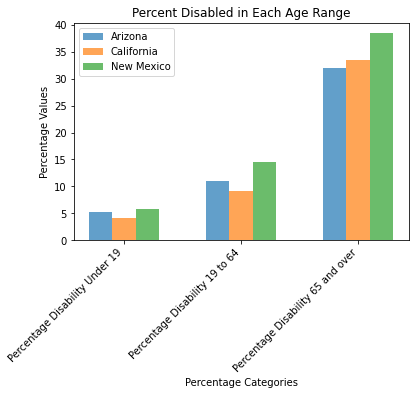

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'AZ_CA_NM_disability' is your DataFrame
# Replace 'AZ_CA_NM_disability' with your actual DataFrame name

# Select relevant columns for visualization
columns_to_plot = ['Percentage Disability Under 19', 'Percentage Disability 19 to 64', 'Percentage Disability 65 and over']

# Extract data for Arizona, California, and New Mexico
arizona_data = AZ_CA_NM_disability.loc[AZ_CA_NM_disability['Label (Grouping)'] == 'Arizona', columns_to_plot].values.flatten()
california_data = AZ_CA_NM_disability.loc[AZ_CA_NM_disability['Label (Grouping)'] == 'California', columns_to_plot].values.flatten()
new_mexico_data = AZ_CA_NM_disability.loc[AZ_CA_NM_disability['Label (Grouping)'] == 'New Mexico', columns_to_plot].values.flatten()

# Set up positions for bars
bar_width = 0.2
bar_positions_arizona = np.arange(len(columns_to_plot))
bar_positions_california = bar_positions_arizona + bar_width
bar_positions_new_mexico = bar_positions_california + bar_width

# Create bar graph
plt.bar(bar_positions_arizona, arizona_data, width=bar_width, label='Arizona', alpha=0.7)
plt.bar(bar_positions_california, california_data, width=bar_width, label='California', alpha=0.7)
plt.bar(bar_positions_new_mexico, new_mexico_data, width=bar_width, label='New Mexico', alpha=0.7)

# Set axis labels and chart title
plt.xlabel('Percentage Categories')
plt.ylabel('Percentage Values')
plt.title('Percent Disabled in Each Age Range')
plt.xticks(bar_positions_california, columns_to_plot, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()


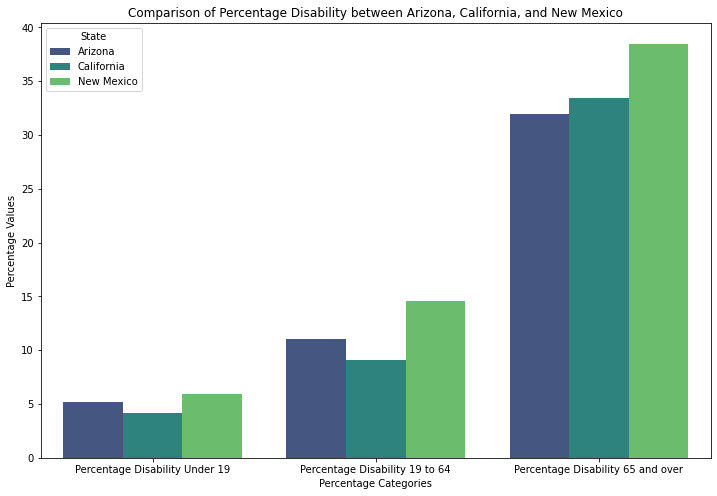

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'AZ_CA_NM_disability' is your DataFrame
# Replace 'AZ_CA_NM_disability' with your actual DataFrame name

# Select relevant columns for visualization
columns_to_plot = ['Percentage Disability Under 19', 'Percentage Disability 19 to 64', 'Percentage Disability 65 and over']

# Filter data for Arizona, California, and New Mexico
arizona_data = AZ_CA_NM_disability.loc[AZ_CA_NM_disability['Label (Grouping)'] == 'Arizona', columns_to_plot].values.flatten()
california_data = AZ_CA_NM_disability.loc[AZ_CA_NM_disability['Label (Grouping)'] == 'California', columns_to_plot].values.flatten()
new_mexico_data = AZ_CA_NM_disability.loc[AZ_CA_NM_disability['Label (Grouping)'] == 'New Mexico', columns_to_plot].values.flatten()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'State': ['Arizona'] * len(columns_to_plot) + ['California'] * len(columns_to_plot) + ['New Mexico'] * len(columns_to_plot),
    'Percentage Category': columns_to_plot * 3,
    'Percentage Value': np.concatenate([arizona_data, california_data, new_mexico_data])
})

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage Category', y='Percentage Value', hue='State', data=plot_data, palette='viridis')

# Set axis labels and chart title
plt.xlabel('Percentage Categories')
plt.ylabel('Percentage Values')
plt.title('Comparison of Percentage Disability between Arizona, California, and New Mexico')

# Show the plot
plt.show()



In [19]:
AZ_CA_NM_disability_NH = AZ_CA_NM_label.loc[:, ['Label (Grouping)', 'Total:', 'Under 19 years:', 'With a disability:'
                                          ,'No health insurance coverage','19 to 64 years:', 
                          'With a disability:.1','No health insurance coverage.2'
                                          ,'65 years and over:', 'With a disability:.2','No health insurance coverage.4']]
AZ_CA_NM_disability_NH

,Label (Grouping),Total:,Under 19 years:,With a disability:,No health insurance coverage,19 to 64 years:,With a disability:.1,No health insurance coverage.2,65 years and over:,With a disability:.2,No health insurance coverage.4
2,Arizona,7251924.0,1683061.0,86850.0,5555.0,4206665.0,463351.0,50220.0,1362198.0,434713.0,3131.0
4,California,38548670.0,9016549.0,373663.0,10219.0,23477300.0,2128786.0,145049.0,6054821.0,2024775.0,19232.0
31,New Mexico,2074351.0,483198.0,28452.0,66.0,1191031.0,173234.0,15292.0,400122.0,153954.0,930.0


In [44]:
# Calculate the percent of diabled without health insurance for each age range
AZ_CA_NM_disability_NH['% of Under 19 disabled w/o insurance'] = (AZ_CA_NM_disability_NH['No health insurance coverage'] 
                                                      / AZ_CA_NM_disability_NH['With a disability:']) * 100

AZ_CA_NM_disability_NH['% of 19 to 64 disabled w/o insurance'] = (AZ_CA_NM_disability_NH['No health insurance coverage.2'] 
                                                      / AZ_CA_NM_disability_NH['With a disability:.1']) * 100

AZ_CA_NM_disability_NH['% of 65 and over disabled w/o insurance'] = (AZ_CA_NM_disability_NH['No health insurance coverage.4']
                                                         / AZ_CA_NM_disability_NH['With a disability:.2']) * 100

AZ_CA_NM_disability_NH

,Label (Grouping),Total:,Under 19 years:,With a disability:,No health insurance coverage,19 to 64 years:,With a disability:.1,No health insurance coverage.2,65 years and over:,With a disability:.2,No health insurance coverage.4,% of Under 19 disabled w/o insurance,% of 19 to 64 disabled w/o insurance,% of 65 and over disabled w/o insurance
2,Arizona,7251924.0,1683061.0,86850.0,5555.0,4206665.0,463351.0,50220.0,1362198.0,434713.0,3131.0,6.396085,10.838436,0.720245
4,California,38548670.0,9016549.0,373663.0,10219.0,23477300.0,2128786.0,145049.0,6054821.0,2024775.0,19232.0,2.734817,6.813696,0.949834
31,New Mexico,2074351.0,483198.0,28452.0,66.0,1191031.0,173234.0,15292.0,400122.0,153954.0,930.0,0.231970,8.827366,0.604077


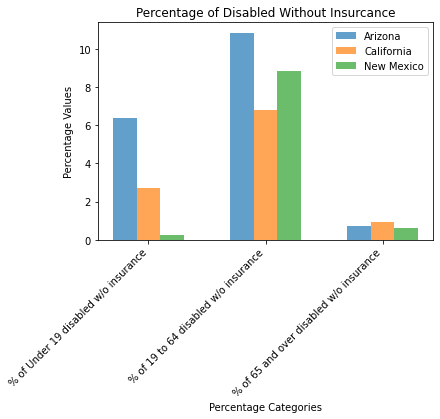

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Select relevant columns for visualization
columns_to_plot = ['% of Under 19 disabled w/o insurance', '% of 19 to 64 disabled w/o insurance', '% of 65 and over disabled w/o insurance']

# Extract data for Arizona, California, and New Mexico
arizona_data = AZ_CA_NM_disability_NH.loc[AZ_CA_NM_disability_NH['Label (Grouping)'] == 'Arizona', columns_to_plot].values.flatten()
california_data = AZ_CA_NM_disability_NH.loc[AZ_CA_NM_disability_NH['Label (Grouping)'] == 'California', columns_to_plot].values.flatten()
new_mexico_data = AZ_CA_NM_disability_NH.loc[AZ_CA_NM_disability_NH['Label (Grouping)'] == 'New Mexico', columns_to_plot].values.flatten()

# Set up positions for bars
bar_width = 0.2
bar_positions_arizona = np.arange(len(columns_to_plot))
bar_positions_california = bar_positions_arizona + bar_width
bar_positions_new_mexico = bar_positions_california + bar_width

# Create bar graph
plt.bar(bar_positions_arizona, arizona_data, width=bar_width, label='Arizona', alpha=0.7)
plt.bar(bar_positions_california, california_data, width=bar_width, label='California', alpha=0.7)
plt.bar(bar_positions_new_mexico, new_mexico_data, width=bar_width, label='New Mexico', alpha=0.7)

# Set axis labels and chart title
plt.xlabel('Percentage Categories')
plt.ylabel('Percentage Values')
plt.title('Percentage of Disabled Without Insurcance')
plt.xticks(bar_positions_california, columns_to_plot, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()


In [22]:
# Assuming 'file1' is your DataFrame
# Replace 'file1' with your actual DataFrame name

# Find columns that contain "With a disability:"
disability_columns = [col for col in file1.columns if "With a disability:" in col]

# Group by "Label (Grouping)" and the identified disability columns
label2 = file1.groupby(["Label (Grouping)"] + disability_columns)

print(label2)


In [23]:
withdisability_cols = file1[['Label (Grouping)', 'Total:', 'Under 19 years:', 'With a disability:','19 to 64 years:', 
                          'With a disability:.1','65 years and over:', 'With a disability:.2']]
selected_rows = withdisability_cols[withdisability_cols['Label (Grouping)'].isin(['Arizona', 'California'])]
selected_rows

,Label (Grouping),Total:,Under 19 years:,With a disability:,19 to 64 years:,With a disability:.1,65 years and over:,With a disability:.2
2,Arizona,7251924.0,1683061.0,86850.0,4206665.0,463351.0,1362198.0,434713.0
4,California,38548670.0,9016549.0,373663.0,23477300.0,2128786.0,6054821.0,2024775.0


In [ ]:
type(selected_rows)

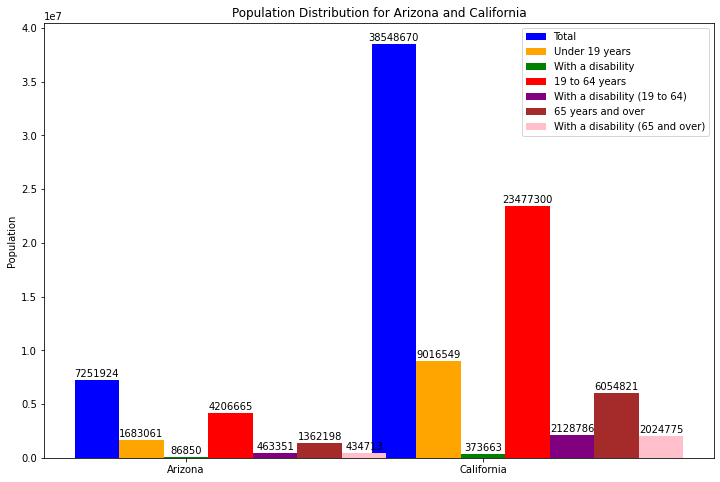

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming "Label (Grouping)" is the index
selected_rows = withdisability_cols[withdisability_cols['Label (Grouping)'].isin(['Arizona', 'California'])]

# Extract relevant columns for the grouped bar chart
labels = selected_rows['Label (Grouping)']
total_values = selected_rows['Total:']
under_19_values = selected_rows['Under 19 years:']
with_disability_values = selected_rows['With a disability:']
years_19_64_values = selected_rows['19 to 64 years:']
with_disability_19_64_values = selected_rows['With a disability:.1']
years_65_over_values = selected_rows['65 years and over:']
with_disability_65_over_values = selected_rows['With a disability:.2']

# Set up positions for bars
bar_width = 0.15
bar_positions = np.arange(len(labels))

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bars_total = ax.bar(bar_positions - 2*bar_width, total_values, bar_width, label='Total', color='blue')
bars_under_19 = ax.bar(bar_positions - bar_width, under_19_values, bar_width, label='Under 19 years', color='orange')
bars_with_disability = ax.bar(bar_positions, with_disability_values, bar_width, label='With a disability', color='green')
bars_19_64 = ax.bar(bar_positions + bar_width, years_19_64_values, bar_width, label='19 to 64 years', color='red')
bars_disability_19_64 = ax.bar(bar_positions + 2*bar_width, with_disability_19_64_values, bar_width, label='With a disability (19 to 64)', color='purple')
bars_65_over = ax.bar(bar_positions + 3*bar_width, years_65_over_values, bar_width, label='65 years and over', color='brown')
bars_disability_65_over = ax.bar(bar_positions + 4*bar_width, with_disability_65_over_values, bar_width, label='With a disability (65 and over)', color='pink')

# Adding data labels on top of the bars
for bars in [bars_total, bars_under_19, bars_with_disability, bars_19_64, bars_disability_19_64, bars_65_over, bars_disability_65_over]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 100000, round(yval), ha='center', va='bottom')

# Adding labels, title, and legend
ax.set_ylabel('Population')
ax.set_title('Population Distribution for Arizona and California')
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend()

# Show the grouped bar chart
plt.show()


In [25]:
# Assuming selected_rows is the dataframe with the data

# Calculate percentages
percentage_under_19 = (selected_rows['With a disability:'] / selected_rows['Under 19 years:']) * 100
percentage_19_64 = (selected_rows['With a disability:.1'] / selected_rows['19 to 64 years:']) * 100
percentage_65_over = (selected_rows['With a disability:.2'] / selected_rows['65 years and over:']) * 100

# Create a new dataframe
percentage_AZ_CA = pd.DataFrame({
    'Label (Grouping)': selected_rows['Label (Grouping)'],
    'Percentage Under 19': percentage_under_19,
    'Percentage 19 to 64': percentage_19_64,
    'Percentage 65 and over': percentage_65_over
})

# Display the new dataframe
print(percentage_AZ_CA)


  Label (Grouping)  Percentage Under 19  Percentage 19 to 64  \
2          Arizona             5.160241            11.014687   
4       California             4.144191             9.067423   

   Percentage 65 and over  
2               31.912615  
4               33.440708  


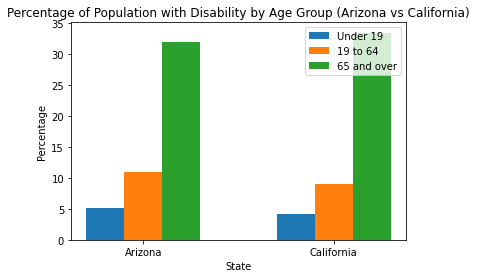

In [26]:
# import matplotlib.pyplot as plt

# Assuming percentage_AZ_CA is the dataframe with the calculated percentages

# Set the label and data
labels = percentage_AZ_CA['Label (Grouping)']
percentage_under_19 = percentage_AZ_CA['Percentage Under 19']
percentage_19_64 = percentage_AZ_CA['Percentage 19 to 64']
percentage_65_over = percentage_AZ_CA['Percentage 65 and over']

# Set the bar width
bar_width = 0.2

# Set the positions of bars on X-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar graph
plt.bar(r1, percentage_under_19, width=bar_width, label='Under 19')
plt.bar(r2, percentage_19_64, width=bar_width, label='19 to 64')
plt.bar(r3, percentage_65_over, width=bar_width, label='65 and over')

# Set X-axis labels
plt.xlabel('State')
plt.xticks([r + bar_width for r in range(len(labels))], labels)

# Set Y-axis label
plt.ylabel('Percentage')

# Add legend
plt.legend()

# Set title
plt.title('Percentage of Population with Disability by Age Group (Arizona vs California)')

# Show the plot
plt.show()


In [46]:
from sklearn.preprocessing import StandardScaler

# Assuming file1 is your dataframe with relevant columns for clustering
columns_for_clustering = file1[['Total:', 'Under 19 years:', 'With a disability:']]

# Data Preprocessing
columns_for_clustering = columns_for_clustering.apply(pd.to_numeric, errors='coerce')

# Handling missing values
columns_for_clustering.fillna(0, inplace=True)

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(columns_for_clustering)

# Manually assign regions based on the general knowledge of East and West states
east_states = ['Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Kentucky', 'Louisiana'
               , 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York'
               , 'North Carolina', 'Ohio', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia'
               , 'West Virginia']
file1['Region'] = 'West'
file1.loc[file1['Label (Grouping)'].isin(east_states), 'Region'] = 'East'

# Creating a new dataframe file2 with the added 'Region' column right next to 'Label (Grouping)'
file2 = file1[['Label (Grouping)', 'Region'] + list(file1.columns[:-2])]

# You can explore the data
print(file2)


        Label (Grouping) Region      Label (Grouping)      Total:  \
0                Alabama   East               Alabama   4988625.0   
1                 Alaska   West                Alaska    701511.0   
2                Arizona   West               Arizona   7251924.0   
3               Arkansas   West              Arkansas   2991199.0   
4             California   West            California  38548670.0   
5               Colorado   West              Colorado   5742363.0   
6            Connecticut   East           Connecticut   3582236.0   
7               Delaware   East              Delaware   1005551.0   
8   District of Columbia   West  District of Columbia    661425.0   
9                Florida   East               Florida  21904247.0   
10               Georgia   East               Georgia  10718050.0   
11                Hawaii   West                Hawaii   1383700.0   
12                 Idaho   West                 Idaho   1911951.0   
13              Illinois   East   

In [28]:
west_coast_data = file2[file2['Region'].isin(['West'])]
print(west_coast_data)

        Label (Grouping) Region      Label (Grouping)      Total:  \
1                 Alaska   West                Alaska    701511.0   
2                Arizona   West               Arizona   7251924.0   
3               Arkansas   West              Arkansas   2991199.0   
4             California   West            California  38548670.0   
5               Colorado   West              Colorado   5742363.0   
8   District of Columbia   West  District of Columbia    661425.0   
11                Hawaii   West                Hawaii   1383700.0   
12                 Idaho   West                 Idaho   1911951.0   
15                  Iowa   West                  Iowa   3153337.0   
16                Kansas   West                Kansas   2876222.0   
23             Minnesota   West             Minnesota   5657569.0   
25              Missouri   West              Missouri   6071333.0   
26               Montana   West               Montana   1104997.0   
27              Nebraska   West   

In [29]:
region_group=file2. groupby("Region")

In [30]:
region_group.sum()

,Label (Grouping),Label (Grouping),Total:,Under 19 years:,With a disability:,With health insurance coverage:,With private health insurance coverage,With public health coverage,No health insurance coverage,No disability:,...,65 years and over:,With a disability:.2,With health insurance coverage:.4,With private health insurance coverage.4,With public health coverage.4,No health insurance coverage.4,No disability:.2,With health insurance coverage:.5,With private health insurance coverage.5,With public health coverage.5
Region,,,,,,,,,,,,,,,,,,,,,
East,AlabamaConnecticutDelawareFloridaGeorgiaIllino...,AlabamaConnecticutDelawareFloridaGeorgiaIllino...,186356677.0,42271548.0,2184601.0,2113810.0,1002213.0,1337443.0,70791.0,40086947.0,...,33677008.0,11036339.0,10973678.0,5761242.0,10796767.0,62661.0,22640669.0,22463659.0,13158708.0,21402391.0
West,AlaskaArizonaArkansasCaliforniaColoradoDistric...,AlaskaArizonaArkansasCaliforniaColoradoDistric...,145147940.0,35030664.0,1711062.0,1630804.0,782686.0,1017061.0,80258.0,33319602.0,...,23491945.0,8010798.0,7947799.0,3837336.0,7807758.0,62999.0,15481147.0,15321935.0,8341171.0,14563794.0


In [31]:
region_group.get_group("West")["With a disability:"].sum()

1711062.0

In [32]:
def select_columns_regions(group):
    return group[['Region','Under 19 years:', 'With a disability:'
                                          ,'No health insurance coverage','19 to 64 years:', 
                          'With a disability:.1','No health insurance coverage.2'
                                          ,'65 years and over:', 'With a disability:.2','No health insurance coverage.4']].sum()
region_NH = region_group.apply(select_columns_regions).reset_index(drop=True)
region_NH

,Region,Under 19 years:,With a disability:,No health insurance coverage,19 to 64 years:,With a disability:.1,No health insurance coverage.2,65 years and over:,With a disability:.2,No health insurance coverage.4
0,EastEastEastEastEastEastEastEastEastEastEastEa...,42271548.0,2184601.0,70791.0,110408121.0,12582955.0,1087790.0,33677008.0,11036339.0,62661.0
1,WestWestWestWestWestWestWestWestWestWestWestWe...,35030664.0,1711062.0,80258.0,86625331.0,9405576.0,996530.0,23491945.0,8010798.0,62999.0


In [33]:
No_insurance= region_group[["No health insurance coverage", "No health insurance coverage.1", "No health insurance coverage.2"]].sum()
No_insurance

,No health insurance coverage,No health insurance coverage.1,No health insurance coverage.2
Region,,,
East,70791.0,1803865.0,1087790.0
West,80258.0,1989752.0,996530.0


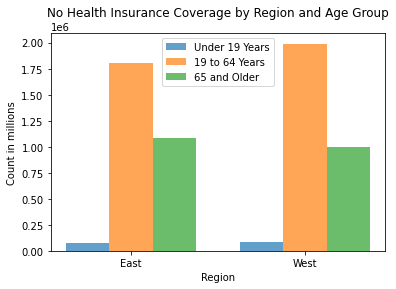

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming No_insurance is your DataFrame
# Reset the index to make 'Region' a column again
No_insurance.reset_index(drop=True, inplace=True)


# Set up positions for bars
bar_positions = np.arange(len(No_insurance))
bar_width = 0.25

# Create bar graph
plt.bar(bar_positions, No_insurance['No health insurance coverage'], width=bar_width, label='Under 19 Years', alpha=0.7)
plt.bar(bar_positions + bar_width, No_insurance['No health insurance coverage.1'], width=bar_width, label='19 to 64 Years', alpha=0.7)
plt.bar(bar_positions + 2 * bar_width, No_insurance['No health insurance coverage.2'], width=bar_width, label='65 and Older', alpha=0.7)

# Set axis labels and chart title
plt.xlabel('Region')
plt.ylabel('Count in millions')
plt.title('No Health Insurance Coverage by Region and Age Group')
plt.xticks(bar_positions + bar_width, No_insurance['Region'])
plt.legend()

# Show the plot
plt.show()
